#***CLUSTERING PELANGGAN***



## *Mount Data*

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error

In [ ]:
drive.mount('/content/drive')
path_data = '/content/drive/My Drive/MSIB/Project_Kelompok/dataset/'
os.listdir(path_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['dataset.csv',
 'dataset.gsheet',
 'dataset_kurir.csv',
 'data_feature.gsheet',
 'dataset_case5.gsheet',
 'dataset_case5.csv',
 'Data_Feature.csv',
 'temp_data',
 'Data_Feature_Add_Column.csv',
 'data feature.csv']

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv(path_data + 'Data_Feature_Add_Column.csv')

## *EDA SINGKAT*

In [ ]:
df.head()

,Waktu Pembaruan,Sinkronisasi Terakhir,Tanggal Pembuatan,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Waktu Pembayaran,Waktu Pengiriman,Waktu Penyelesaian,Variant Produk,Harga Awal Produk,Total Berat(g),Subtotal,Kota,Total,Biaya Pengiriman,Biaya Kirim Ditanggung Pembeli,Asuransi,Total Diskon,Biaya Komisi,Biaya Layanan,Ongkir Dibayar Sistem,Potongan Biaya Pengiriman,Koin,Voucher Channel,Diskon Penjual,Alasan Pembatalan,SKU_1,SKU_2,SKU_3,SKU_4,SKU_5,SKU_6,SKU_7,SKU_8,SKU_9,SKU_10,SKU_11,SKU_12,ID Pesanan Hashed,is_diskon,Jumlah_SKU,Year,Month,WeekOfYear,WeekOfMonth,MonthWeekLabel,Day,Hour,Minute,Nama_hari
0,2024-05-15 09:32:00,2024-05-15 09:35:00,14-05-2024 11:29,Pesanan Normal,Toko Ijo,Toko 1,Online Payment,2024-05-14 11:52:00,2024-05-14 13:40:00,2024-05-15 09:32:00,COMBO (500ML+330ML),989800.0,650.0,890820.0,KOTA DEPOK,829152.0,0.0,29500.0,0.0,0.0,-35633.0,-26035.0,-29500.0,20000.0,0.0,89082.0,0.0,Others / change of mind,103.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747909763bd0341883eb2726872231248ee39bdf9d6fbf...,Ya,2,2024,5,20,3,2024-M5-W3,2024-05-14,11,52,Selasa
1,2024-05-14 17:45:00,2024-05-14 13:09:00,14-05-2024 10:19,Pesanan Normal,Toko Biru,Toko 2,Bank 1,2024-05-14 10:19:00,2024-05-14 13:40:00,2024-05-15 09:32:00,1PC,99900.0,250.0,99900.0,Kota Administrasi Jakarta Selatan,135800.0,35000.0,0.0,900.0,23993.0,0.0,0.0,0.0,17000.0,0.0,6993.0,0.0,Others / change of mind,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...,Tidak,1,2024,5,20,3,2024-M5-W3,2024-05-14,10,19,Selasa
2,2024-05-15 06:05:00,2024-05-15 06:05:00,14-05-2024 08:16,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 08:16:00,2024-05-14 13:40:00,2024-05-15 06:05:00,1pc,39900.0,250.0,39900.0,KOTA SURABAYA,35431.0,0.0,0.0,0.0,0.0,-1596.0,-2873.0,0.0,9000.0,0.0,0.0,0.0,Others / change of mind,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e1749e58062288683656be54ff11cf2ac8212c9ad8e0ba...,Ya,1,2024,5,20,3,2024-M5-W3,2024-05-14,8,16,Selasa
3,2024-05-15 11:22:00,2024-05-15 11:27:00,14-05-2024 07:34,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 07:34:00,2024-05-14 13:40:00,2024-05-15 11:22:00,1pc,99900.0,250.0,99900.0,KOTA SURABAYA,88711.0,0.0,0.0,0.0,0.0,-3996.0,-7193.0,0.0,6500.0,0.0,0.0,0.0,Others / change of mind,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5b7bcb467b8de93f4e7bfd84bdfe4fbd5407fdc512d3c6...,Ya,1,2024,5,20,3,2024-M5-W3,2024-05-14,7,34,Selasa
4,2024-05-14 14:03:00,2024-05-14 14:09:00,13-05-2024 12:44,Pesanan Normal,Toko Ijo,Toko 1,Digital Wallet,2024-05-13 12:45:00,2024-05-13 16:39:00,2024-05-14 14:03:00,100ML + 300ML,139800.0,500.0,128616.0,KOTA TANGERANG,110224.0,0.0,0.0,0.0,0.0,-10932.0,-7460.0,0.0,9000.0,0.0,19293.0,0.0,Others / change of mind,137.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52fb6e8e534ce863ef8b4613a80d05495b449ac69cc396...,Ya,2,2024,5,20,3,2024-M5-W3,2024-05-13,12,45,Senin


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Waktu Pembaruan                 3312 non-null   object 
 1   Sinkronisasi Terakhir           3312 non-null   object 
 2   Tanggal Pembuatan               3312 non-null   object 
 3   Jenis Pesanan                   3312 non-null   object 
 4   Channel                         3312 non-null   object 
 5   Nama Toko                       3312 non-null   object 
 6   Pembayaran                      3312 non-null   object 
 7   Waktu Pembayaran                3312 non-null   object 
 8   Waktu Pengiriman                3312 non-null   object 
 9   Waktu Penyelesaian              3312 non-null   object 
 10  Variant Produk                  3312 non-null   object 
 11  Harga Awal Produk               3312 non-null   float64
 12  Total Berat(g)                  33

In [ ]:
df.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     0
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

## *FEATURE ENGINEERING*

### Ubah Kolom Kota menjadi lebih singkat

In [ ]:
# Mapping untuk mengganti nama kota
replace_dict = {
    'KOTA JAKARTA UTARA': 'Kota Jakarta Utara',
    'Kota Administrasi Jakarta Utara': 'Kota Jakarta Utara',
    'KOTA JAKARTA BARAT': 'Kota Jakarta Barat',
    'Kota Administrasi Jakarta Barat': 'Kota Jakarta Barat',
    'KOTA JAKARTA SELATAN': 'Kota Jakarta Selatan',
    'Kota Administrasi Jakarta Selatan': 'Kota Jakarta Selatan',
    'KOTA JAKARTA TIMUR': 'Kota Jakarta Timur',
    'Kota Administrasi Jakarta Timur': 'Kota Jakarta Timur',
    'KOTA JAKARTA PUSAT': 'Kota Jakarta Pusat',
    'Kota Administrasi Jakarta Pusat': 'Kota Jakarta Pusat',
    'KOTA SURABAYA': 'Kota Surabaya',
    'Kota Surabaya': 'Kota Surabaya',
    'KOTA TANGERANG': 'Kota Tangerang',
    'Kab. Tangerang': 'Kabupaten Tangerang',
    'Kota Tangerang': 'Kota Tangerang',
    'KOTA TANGERANG SELATAN': 'Kota Tangerang Selatan',
    'Kota Tangerang Selatan': 'Kota Tangerang Selatan',
    'KOTA BEKASI': 'Kota Bekasi',
    'Kab. Bekasi': 'Kabupaten Bekasi',
    'Kota Bekasi': 'Kota Bekasi',
    'KOTA BANDUNG': 'Kota Bandung',
    'Kab. Bandung': 'Kabupaten Bandung',
    'Kota Bandung': 'Kota Bandung',
    'KOTA BOGOR': 'Kota Bogor',
    'Kab. Bogor': 'Kabupaten Bogor',
    'Kota Bogor': 'Kota Bogor',
    'KOTA MALANG': 'Kota Malang',
    'Kab. Malang': 'Kabupaten Malang',
    'Kota Malang': 'Kota Malang',
    'KOTA DENPASAR': 'Kota Denpasar',
    'Kota Denpasar': 'Kota Denpasar',
    'KOTA DEPOK': 'Kota Depok',
    'Kota Depok': 'Kota Depok',
    'KOTA MANADO': 'Kota Manado',
    'Kota Manado': 'Kota Manado',
    'KOTA PONTIANAK': 'Kota Pontianak',
    'Kota Pontianak': 'Kota Pontianak',
    'KOTA MATARAM': 'Kota Mataram',
    'Kota Mataram': 'Kota Mataram',
    'KOTA BANDAR LAMPUNG': 'Kota Bandar Lampung',
    'Kota Bandar Lampung': 'Kota Bandar Lampung',
    'KOTA PADANG': 'Kota Padang',
    'Kota Padang': 'Kota Padang',
    'KOTA PEKANBARU': 'Kota Pekanbaru',
    'Kota Pekanbaru': 'Kota Pekanbaru',
    'KOTA PALU': 'Kota Palu',
    'Kota Palu': 'Kota Palu',
    'KOTA PALANGKA RAYA': 'Kota Palangka Raya',
    'Kota Palangka Raya': 'Kota Palangka Raya',
    'KOTA YOGYAKARTA': 'Kota Yogyakarta',
    'Kota Yogyakarta': 'Kota Yogyakarta',
    'KOTA SURAKARTA (SOLO)': 'Kota Surakarta',
    'Kota Surakarta': 'Kota Surakarta',
    'KOTA TEGAL': 'Kota Tegal',
    'Kota Tegal': 'Kota Tegal',
    'KOTA BANJARMASIN': 'Kota Banjarmasin',
    'Kota Banjarmasin': 'Kota Banjarmasin',
    'KOTA PANGKAL PINANG': 'Kota Pangkal Pinang',
    'Kota Pangkal Pinang': 'Kota Pangkal Pinang',
    'KOTA CIREBON': 'Kota Cirebon',
    'Kota Cirebon': 'Kota Cirebon',
    'KOTA BONTANG': 'Kota Bontang',
    'Kota Bontang': 'Kota Bontang'
}

df['Kota'] = df['Kota'].replace(replace_dict)

In [ ]:
df['Kota'].value_counts()

Kota
Kota Surabaya                             427
Kota Jakarta Utara                        366
Kota Jakarta Barat                        322
Kota Jakarta Selatan                      201
Kota Jakarta Timur                        141
KAB. TANGERANG                            124
Kota Bekasi                               102
Kota Tangerang                            100
Kota Tangerang Selatan                     99
Kota Bandung                               87
Kota Jakarta Pusat                         77
KAB. BOGOR                                 61
KOTA MEDAN                                 52
KAB. SIDOARJO                              49
KOTA SEMARANG                              46
Kota Depok                                 46
KOTA PALEMBANG                             38
Kota Malang                                37
KAB. BEKASI                                33
Kota Bandar Lampung                        32
Kota Denpasar                              27
Kota Bogor                   

### Hapus yang Total = negatif

In [ ]:
# Mengidentifikasi baris dengan nilai Total kurang dari 0
negative_total_indices = df[df['Total'] < 0].index

# Menghapus baris-baris dengan nilai Total kurang dari 0
df.drop(index=negative_total_indices, inplace=True)

### Nambah Kolom Kela


In [ ]:
# df['Kelas_Pelanggan'] = pd.cut(df['Total'],
#                                bins=[-1, 500000, 1000000, float('inf')],
#                                labels=['rendah', 'menengah', 'tinggi'])

In [ ]:
## Checkpoint_copy_data
df_cluster = df.copy()

In [ ]:
df_cluster.head()

,Waktu Pembaruan,Sinkronisasi Terakhir,Tanggal Pembuatan,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Waktu Pembayaran,Waktu Pengiriman,Waktu Penyelesaian,Variant Produk,Harga Awal Produk,Total Berat(g),Subtotal,Kota,Total,Biaya Pengiriman,Biaya Kirim Ditanggung Pembeli,Asuransi,Total Diskon,Biaya Komisi,Biaya Layanan,Ongkir Dibayar Sistem,Potongan Biaya Pengiriman,Koin,Voucher Channel,Diskon Penjual,Alasan Pembatalan,SKU_1,SKU_2,SKU_3,SKU_4,SKU_5,SKU_6,SKU_7,SKU_8,SKU_9,SKU_10,SKU_11,SKU_12,ID Pesanan Hashed,is_diskon,Jumlah_SKU,Year,Month,WeekOfYear,WeekOfMonth,MonthWeekLabel,Day,Hour,Minute,Nama_hari
0,2024-05-15 09:32:00,2024-05-15 09:35:00,14-05-2024 11:29,Pesanan Normal,Toko Ijo,Toko 1,Online Payment,2024-05-14 11:52:00,2024-05-14 13:40:00,2024-05-15 09:32:00,COMBO (500ML+330ML),989800.0,650.0,890820.0,Kota Depok,829152.0,0.0,29500.0,0.0,0.0,-35633.0,-26035.0,-29500.0,20000.0,0.0,89082.0,0.0,Others / change of mind,103.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747909763bd0341883eb2726872231248ee39bdf9d6fbf...,Ya,2,2024,5,20,3,2024-M5-W3,2024-05-14,11,52,Selasa
1,2024-05-14 17:45:00,2024-05-14 13:09:00,14-05-2024 10:19,Pesanan Normal,Toko Biru,Toko 2,Bank 1,2024-05-14 10:19:00,2024-05-14 13:40:00,2024-05-15 09:32:00,1PC,99900.0,250.0,99900.0,Kota Jakarta Selatan,135800.0,35000.0,0.0,900.0,23993.0,0.0,0.0,0.0,17000.0,0.0,6993.0,0.0,Others / change of mind,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...,Tidak,1,2024,5,20,3,2024-M5-W3,2024-05-14,10,19,Selasa
2,2024-05-15 06:05:00,2024-05-15 06:05:00,14-05-2024 08:16,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 08:16:00,2024-05-14 13:40:00,2024-05-15 06:05:00,1pc,39900.0,250.0,39900.0,Kota Surabaya,35431.0,0.0,0.0,0.0,0.0,-1596.0,-2873.0,0.0,9000.0,0.0,0.0,0.0,Others / change of mind,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e1749e58062288683656be54ff11cf2ac8212c9ad8e0ba...,Ya,1,2024,5,20,3,2024-M5-W3,2024-05-14,8,16,Selasa
3,2024-05-15 11:22:00,2024-05-15 11:27:00,14-05-2024 07:34,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 07:34:00,2024-05-14 13:40:00,2024-05-15 11:22:00,1pc,99900.0,250.0,99900.0,Kota Surabaya,88711.0,0.0,0.0,0.0,0.0,-3996.0,-7193.0,0.0,6500.0,0.0,0.0,0.0,Others / change of mind,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5b7bcb467b8de93f4e7bfd84bdfe4fbd5407fdc512d3c6...,Ya,1,2024,5,20,3,2024-M5-W3,2024-05-14,7,34,Selasa
4,2024-05-14 14:03:00,2024-05-14 14:09:00,13-05-2024 12:44,Pesanan Normal,Toko Ijo,Toko 1,Digital Wallet,2024-05-13 12:45:00,2024-05-13 16:39:00,2024-05-14 14:03:00,100ML + 300ML,139800.0,500.0,128616.0,Kota Tangerang,110224.0,0.0,0.0,0.0,0.0,-10932.0,-7460.0,0.0,9000.0,0.0,19293.0,0.0,Others / change of mind,137.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52fb6e8e534ce863ef8b4613a80d05495b449ac69cc396...,Ya,2,2024,5,20,3,2024-M5-W3,2024-05-13,12,45,Senin


### Drop Kolom Yag Tidak Terpakai

In [ ]:
# df_cluster.drop(['ID Pesanan Hashed','Waktu Pembaruan','Sinkronisasi Terakhir','Tanggal Pembuatan','Waktu Pembayaran','Waktu Pengiriman','Waktu Penyelesaian','Day','Variant Produk','SKU_1','SKU_2','SKU_3','SKU_4','SKU_5','SKU_6','SKU_7','SKU_8','SKU_9','SKU_10','SKU_11','SKU_12','Year'], axis = 1, inplace = True)
df_cluster.drop(['Waktu Pembaruan','Subtotal','Sinkronisasi Terakhir','Tanggal Pembuatan','Waktu Pembayaran','Waktu Pengiriman','Waktu Penyelesaian','Variant Produk','Total Berat(g)','Biaya Pengiriman','Biaya Kirim Ditanggung Pembeli','Asuransi','Total Diskon','Biaya Komisi','Biaya Layanan','Ongkir Dibayar Sistem','Potongan Biaya Pengiriman','Koin','Voucher Channel','Diskon Penjual','Alasan Pembatalan','SKU_1','SKU_2','SKU_3','SKU_4','SKU_5','SKU_6','SKU_7','SKU_8','SKU_9','SKU_10','SKU_11','SKU_12','ID Pesanan Hashed','Year','Month','WeekOfYear','WeekOfMonth','MonthWeekLabel','Nama_hari','Day','Minute'], axis = 1, inplace = True)

In [ ]:
label_encoder = LabelEncoder()
# Daftar kolom yang perlu di-encode
columns_to_encode = ['Jenis Pesanan', 'Channel', 'Nama Toko', 'Pembayaran', 'is_diskon','Kota']

# Loop untuk encode semua kolom yang ada dalam daftar
for column in columns_to_encode:
    df_cluster[column] = label_encoder.fit_transform(df_cluster[column])

In [ ]:
df_cluster.head()

,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Harga Awal Produk,Kota,Total,is_diskon,Jumlah_SKU,Hour
0,0,1,0,17,989800.0,196,829152.0,1,2,11
1,0,0,1,0,99900.0,200,135800.0,0,1,10
2,0,1,2,14,39900.0,217,35431.0,1,1,8
3,0,1,2,14,99900.0,217,88711.0,1,1,7
4,0,1,0,14,139800.0,219,110224.0,1,2,12


### HeatMap

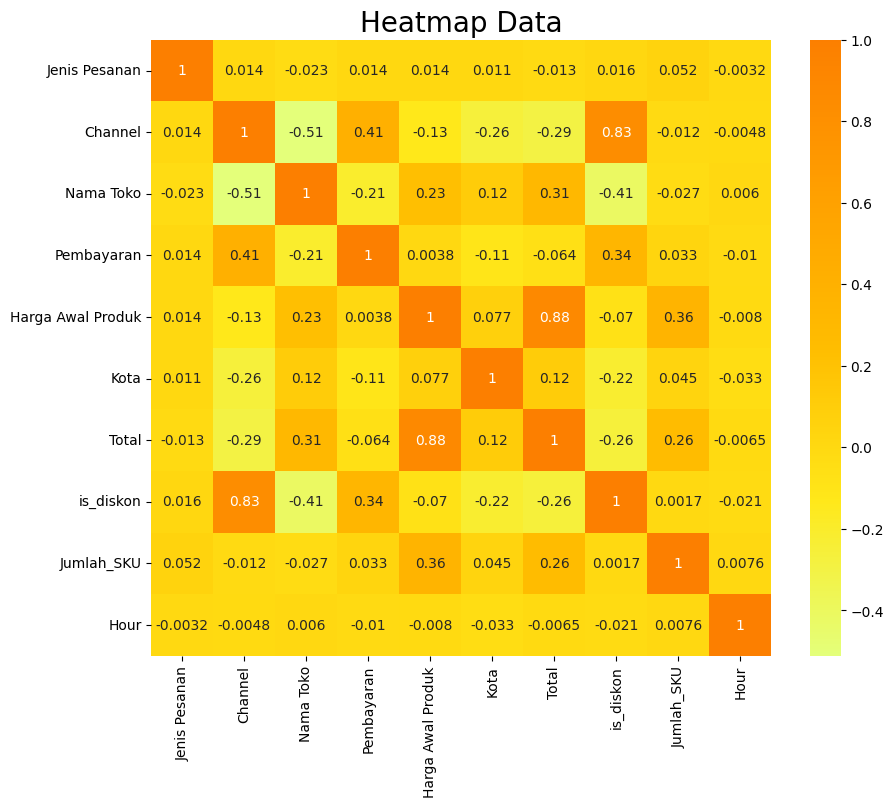

In [ ]:
korelasi = df_cluster.corr()
plt.figure(figsize=(10,8))
sns.heatmap(korelasi, cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

### Standard Scaler

In [ ]:
scaler = StandardScaler()
df_cluster[['Jenis Pesanan','Channel','Nama Toko','Pembayaran','Harga Awal Produk','Total','is_diskon','Jumlah_SKU','Hour','Kota']] = scaler.fit_transform(df_cluster[['Jenis Pesanan','Channel','Nama Toko','Pembayaran','Harga Awal Produk','Total','is_diskon','Jumlah_SKU','Hour','Kota']])
df_cluster.head()

,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Harga Awal Produk,Kota,Total,is_diskon,Jumlah_SKU,Hour
0,-0.081786,0.505092,-0.674892,0.908958,1.160079,0.458371,1.221015,0.604451,0.104016,-0.357606
1,-0.081786,-1.979839,0.274372,-4.599495,-0.438874,0.524177,-0.290720,-1.654394,-0.624096,-0.528241
2,-0.081786,0.505092,1.223636,-0.063122,-0.546681,0.803852,-0.509557,0.604451,-0.624096,-0.869511
3,-0.081786,0.505092,1.223636,-0.063122,-0.438874,0.803852,-0.393389,0.604451,-0.624096,-1.040146
4,-0.081786,0.505092,-0.674892,-0.063122,-0.367183,0.836755,-0.346484,0.604451,0.104016,-0.186972


## *MODELLING CLUSTER*

In [ ]:
cluster = KMeans(n_clusters=3, random_state = 42)
cluster.fit(df_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")
data_segment = pd.concat([df_cluster, segment], axis=1)
data_segment.head(10)

,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Harga Awal Produk,Kota,Total,is_diskon,Jumlah_SKU,Hour,segment
0,-0.081786,0.505092,-0.674892,0.908958,1.160079,0.458371,1.221015,0.604451,0.104016,-0.357606,0.0
1,-0.081786,-1.979839,0.274372,-4.599495,-0.438874,0.524177,-0.290720,-1.654394,-0.624096,-0.528241,1.0
2,-0.081786,0.505092,1.223636,-0.063122,-0.546681,0.803852,-0.509557,0.604451,-0.624096,-0.869511,0.0
3,-0.081786,0.505092,1.223636,-0.063122,-0.438874,0.803852,-0.393389,0.604451,-0.624096,-1.040146,0.0
4,-0.081786,0.505092,-0.674892,-0.063122,-0.367183,0.836755,-0.346484,0.604451,0.104016,-0.186972,0.0
5,-0.081786,0.505092,-0.674892,-0.063122,-0.438874,0.392565,-0.400141,0.604451,-0.624096,-1.040146,0.0
6,-0.081786,0.505092,-0.674892,-0.063122,-0.546681,-2.519348,-0.512254,0.604451,-0.624096,1.690011,0.0
7,-0.081786,0.505092,1.223636,0.908958,-0.510745,-1.499356,-0.476712,0.604451,-0.624096,1.690011,0.0
8,-0.081786,0.505092,-0.674892,-0.063122,-0.438874,0.524177,-0.400141,0.604451,-0.624096,0.836837,0.0
9,-0.081786,0.505092,-0.674892,1.232985,-0.474989,0.359662,-0.439285,0.604451,-0.624096,0.666202,0.0


### EVALUASI MODEL WITH (ELBOW)

In [ ]:
Sum_of_squared_error = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state = 42)
    km = km.fit(df_cluster)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

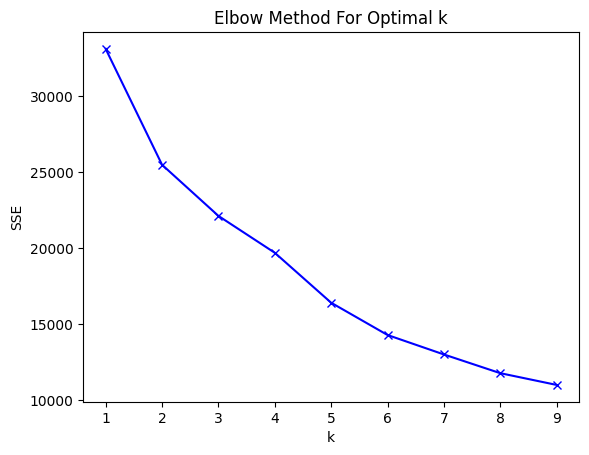

In [ ]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

### EVALUASI MODEL WITH (SILOHOUTE SCORE)

In [ ]:
range_n_clusters = range(2, 10)
best_score = -1
best_k = -1

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters, random_state = 42)
    preds = clusterer.fit_predict(df_cluster)
    score = silhouette_score(df_cluster, preds, random_state = 42)

    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    if score > best_score:
        best_score = score
        best_k = n_clusters

print("Best silhouette score is {} for n_clusters = {}".format(best_score, best_k))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.3732048027687672


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.35596314592670597


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.2251421223704929


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.2391074544812385


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.25832181154583567


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.21800851870128501


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.23190200802487226


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.24118745100743488
Best silhouette score is 0.3732048027687672 for n_clusters = 2


### Modelling Ulang

In [ ]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=2, random_state = 42)
cluster.fit(df_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

### Combine Data + Segment

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")
df_segment = pd.concat([df, segment], axis=1)

## *EDA DAN ANALISIS SETELAH CLU*STER

In [ ]:
df_segment.head()

,Waktu Pembaruan,Sinkronisasi Terakhir,Tanggal Pembuatan,Jenis Pesanan,Channel,Nama Toko,Pembayaran,Waktu Pembayaran,Waktu Pengiriman,Waktu Penyelesaian,Variant Produk,Harga Awal Produk,Total Berat(g),Subtotal,Kota,Total,Biaya Pengiriman,Biaya Kirim Ditanggung Pembeli,Asuransi,Total Diskon,Biaya Komisi,Biaya Layanan,Ongkir Dibayar Sistem,Potongan Biaya Pengiriman,Koin,Voucher Channel,Diskon Penjual,Alasan Pembatalan,SKU_1,SKU_2,SKU_3,SKU_4,SKU_5,SKU_6,SKU_7,SKU_8,SKU_9,SKU_10,SKU_11,SKU_12,ID Pesanan Hashed,is_diskon,Jumlah_SKU,Year,Month,WeekOfYear,WeekOfMonth,MonthWeekLabel,Day,Hour,Minute,Nama_hari,segment
0,2024-05-15 09:32:00,2024-05-15 09:35:00,14-05-2024 11:29,Pesanan Normal,Toko Ijo,Toko 1,Online Payment,2024-05-14 11:52:00,2024-05-14 13:40:00,2024-05-15 09:32:00,COMBO (500ML+330ML),989800.0,650.0,890820.0,Kota Depok,829152.0,0.0,29500.0,0.0,0.0,-35633.0,-26035.0,-29500.0,20000.0,0.0,89082.0,0.0,Others / change of mind,103.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747909763bd0341883eb2726872231248ee39bdf9d6fbf...,Ya,2.0,2024.0,5.0,20.0,3.0,2024-M5-W3,2024-05-14,11.0,52.0,Selasa,1.0
1,2024-05-14 17:45:00,2024-05-14 13:09:00,14-05-2024 10:19,Pesanan Normal,Toko Biru,Toko 2,Bank 1,2024-05-14 10:19:00,2024-05-14 13:40:00,2024-05-15 09:32:00,1PC,99900.0,250.0,99900.0,Kota Jakarta Selatan,135800.0,35000.0,0.0,900.0,23993.0,0.0,0.0,0.0,17000.0,0.0,6993.0,0.0,Others / change of mind,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...,Tidak,1.0,2024.0,5.0,20.0,3.0,2024-M5-W3,2024-05-14,10.0,19.0,Selasa,0.0
2,2024-05-15 06:05:00,2024-05-15 06:05:00,14-05-2024 08:16,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 08:16:00,2024-05-14 13:40:00,2024-05-15 06:05:00,1pc,39900.0,250.0,39900.0,Kota Surabaya,35431.0,0.0,0.0,0.0,0.0,-1596.0,-2873.0,0.0,9000.0,0.0,0.0,0.0,Others / change of mind,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e1749e58062288683656be54ff11cf2ac8212c9ad8e0ba...,Ya,1.0,2024.0,5.0,20.0,3.0,2024-M5-W3,2024-05-14,8.0,16.0,Selasa,1.0
3,2024-05-15 11:22:00,2024-05-15 11:27:00,14-05-2024 07:34,Pesanan Normal,Toko Ijo,Toko 3,Digital Wallet,2024-05-14 07:34:00,2024-05-14 13:40:00,2024-05-15 11:22:00,1pc,99900.0,250.0,99900.0,Kota Surabaya,88711.0,0.0,0.0,0.0,0.0,-3996.0,-7193.0,0.0,6500.0,0.0,0.0,0.0,Others / change of mind,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5b7bcb467b8de93f4e7bfd84bdfe4fbd5407fdc512d3c6...,Ya,1.0,2024.0,5.0,20.0,3.0,2024-M5-W3,2024-05-14,7.0,34.0,Selasa,1.0
4,2024-05-14 14:03:00,2024-05-14 14:09:00,13-05-2024 12:44,Pesanan Normal,Toko Ijo,Toko 1,Digital Wallet,2024-05-13 12:45:00,2024-05-13 16:39:00,2024-05-14 14:03:00,100ML + 300ML,139800.0,500.0,128616.0,Kota Tangerang,110224.0,0.0,0.0,0.0,0.0,-10932.0,-7460.0,0.0,9000.0,0.0,19293.0,0.0,Others / change of mind,137.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52fb6e8e534ce863ef8b4613a80d05495b449ac69cc396...,Ya,2.0,2024.0,5.0,20.0,3.0,2024-M5-W3,2024-05-13,12.0,45.0,Senin,1.0


In [ ]:
df_segment['segment'].value_counts()

segment
1.0    2634
0.0     677
Name: count, dtype: int64

### Analisis By Jumlah Pelanggan tiap cluster

<ipython-input-27-4bb2e24a7b40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


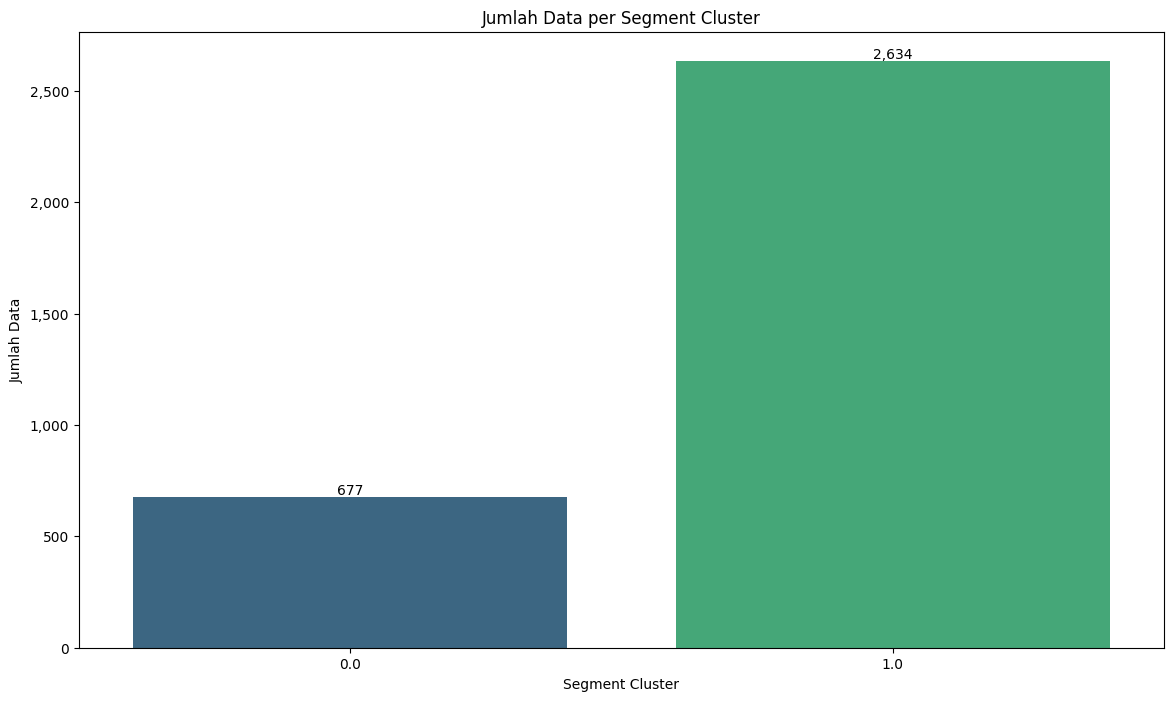

In [ ]:
# Menghitung jumlah orang yang masuk ke setiap segmen
segment_counts = df_segment['segment'].value_counts()

# Visualisasi dengan grafik bar
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')

# Menambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Segment Cluster')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Segment Cluster')

# Menetapkan formatter untuk sumbu Y
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Menggunakan format angka tanpa desimal
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

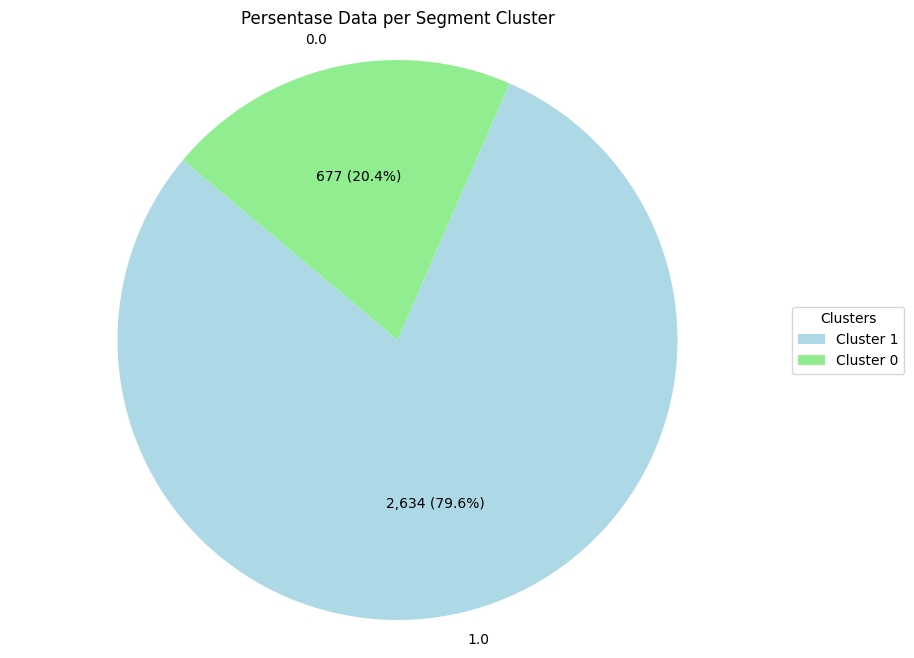

In [ ]:

# Menghitung jumlah orang yang masuk ke setiap segmen
segment_counts = df_segment['segment'].value_counts()

# Definisikan warna untuk setiap cluster
colors = ['lightblue', 'lightgreen']  # Cluster 1: Biru, Cluster 0: Hijau

# Visualisasi dengan grafik pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Menambahkan anotasi
plt.legend(wedges, ['Cluster 1', 'Cluster 0'], title="Clusters", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Menambahkan nilai pasti di dalam plotting
for i, text in enumerate(autotexts):
    text.set_text(f'{segment_counts.values[i]:,.0f} ({text.get_text()})')

plt.title('Persentase Data per Segment Cluster')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### Analisis Rata rata pengeluaran tiap cluster

<ipython-input-29-bec167a7f661>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=segment_avg_total.index, y=segment_avg_total.values, palette='viridis')


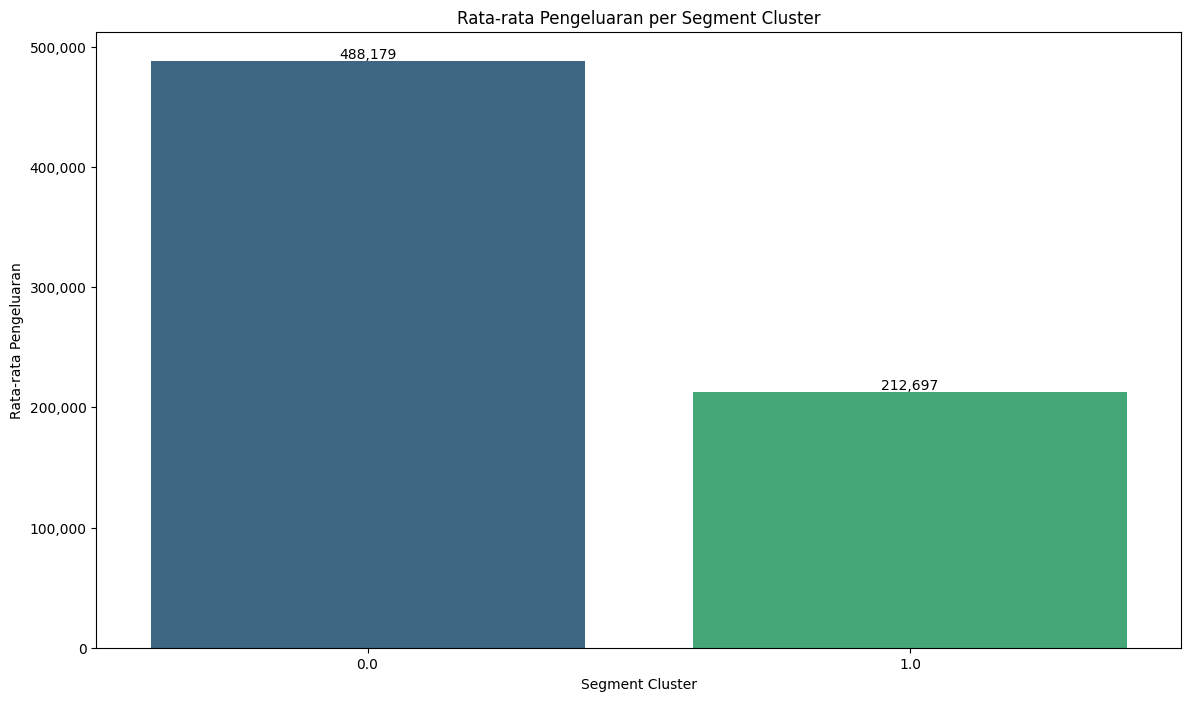

In [ ]:
# Menghitung rata-rata pengeluaran untuk setiap segmen
segment_avg_total = df_segment.groupby('segment')['Total'].mean()

# Visualisasi dengan grafik bar
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=segment_avg_total.index, y=segment_avg_total.values, palette='viridis')

# Menambahkan angka asli di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Segment Cluster')
plt.ylabel('Rata-rata Pengeluaran')
plt.title('Rata-rata Pengeluaran per Segment Cluster')

# Menetapkan formatter untuk sumbu Y
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Menggunakan format angka tanpa desimal
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### Analisis By Channel

<Figure size 1400x1000 with 0 Axes>

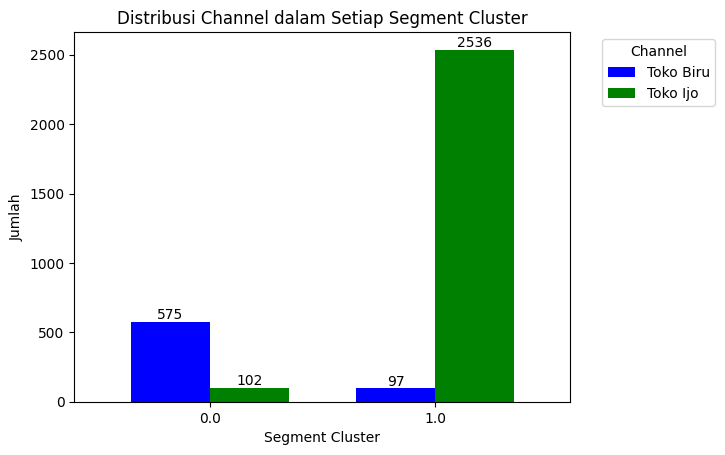

In [ ]:
# Mengelompokkan data berdasarkan segment dan channel, lalu menghitung jumlah kemunculan untuk setiap kombinasi
channel_segment_counts = df_segment.groupby(['segment', 'Channel']).size().unstack().fillna(0)

# Tentukan warna untuk setiap channel
colors = {'Toko Biru': 'blue', 'Toko Ijo': 'green'}

# Mengatur ukuran visualisasi dan lebar bar
plt.figure(figsize=(14, 10))
ax = channel_segment_counts.plot(kind='bar', stacked=False, color=[colors[col] for col in channel_segment_counts.columns], width=0.7)

# Menambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Label dan judul
plt.xlabel('Segment Cluster')
plt.ylabel('Jumlah')
plt.title('Distribusi Channel dalam Setiap Segment Cluster')
plt.xticks(rotation=0)
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Analisis Batas Atas Bawah

<ipython-input-31-853269eb51d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='segment', y='Total', data=df_segment, palette='viridis')


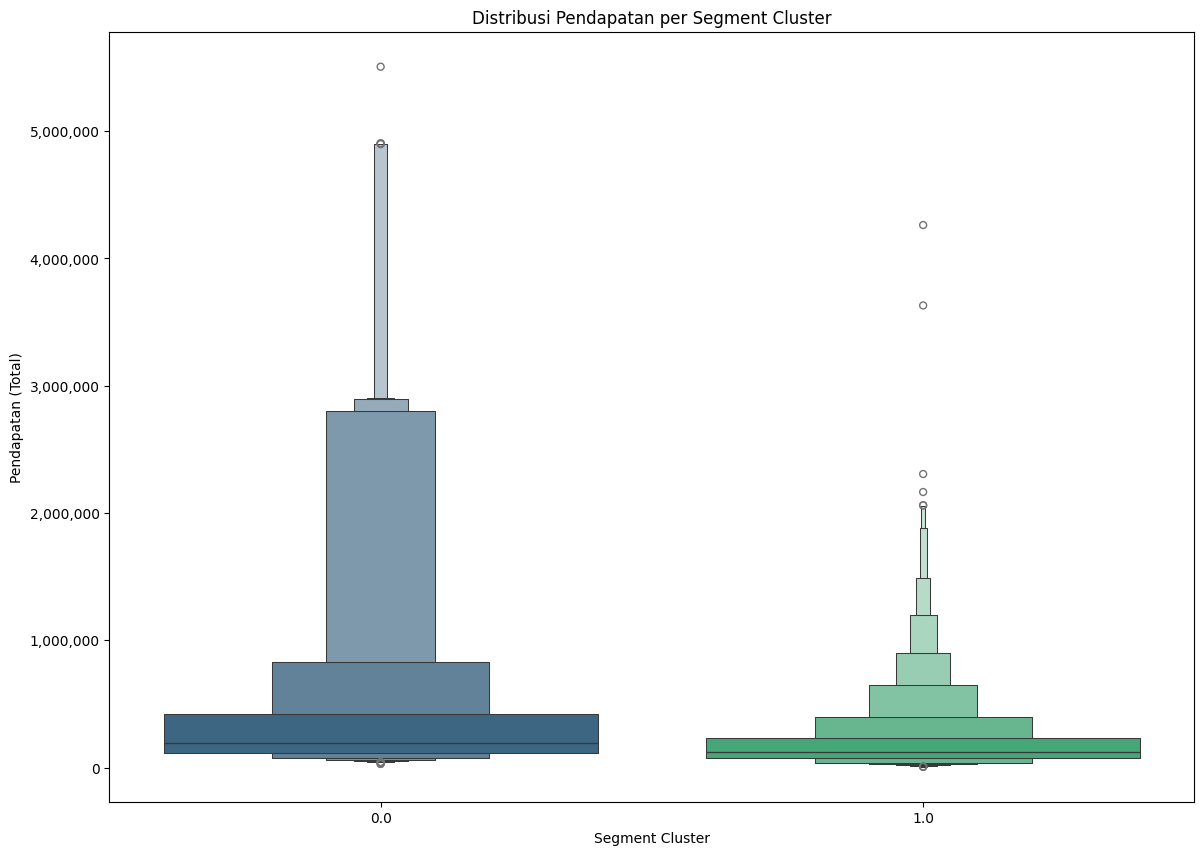

In [ ]:
# Visualisasi dengan boxplot
plt.figure(figsize=(14, 10))
sns.boxenplot(x='segment', y='Total', data=df_segment, palette='viridis')
plt.xlabel('Segment Cluster')
plt.ylabel('Pendapatan (Total)')
plt.title('Distribusi Pendapatan per Segment Cluster')

# Menetapkan formatter untuk sumbu Y
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Menggunakan format angka tanpa desimal
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

<ipython-input-32-a7c77de3a325>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='segment', y='Total', data=df_segment, palette='viridis')


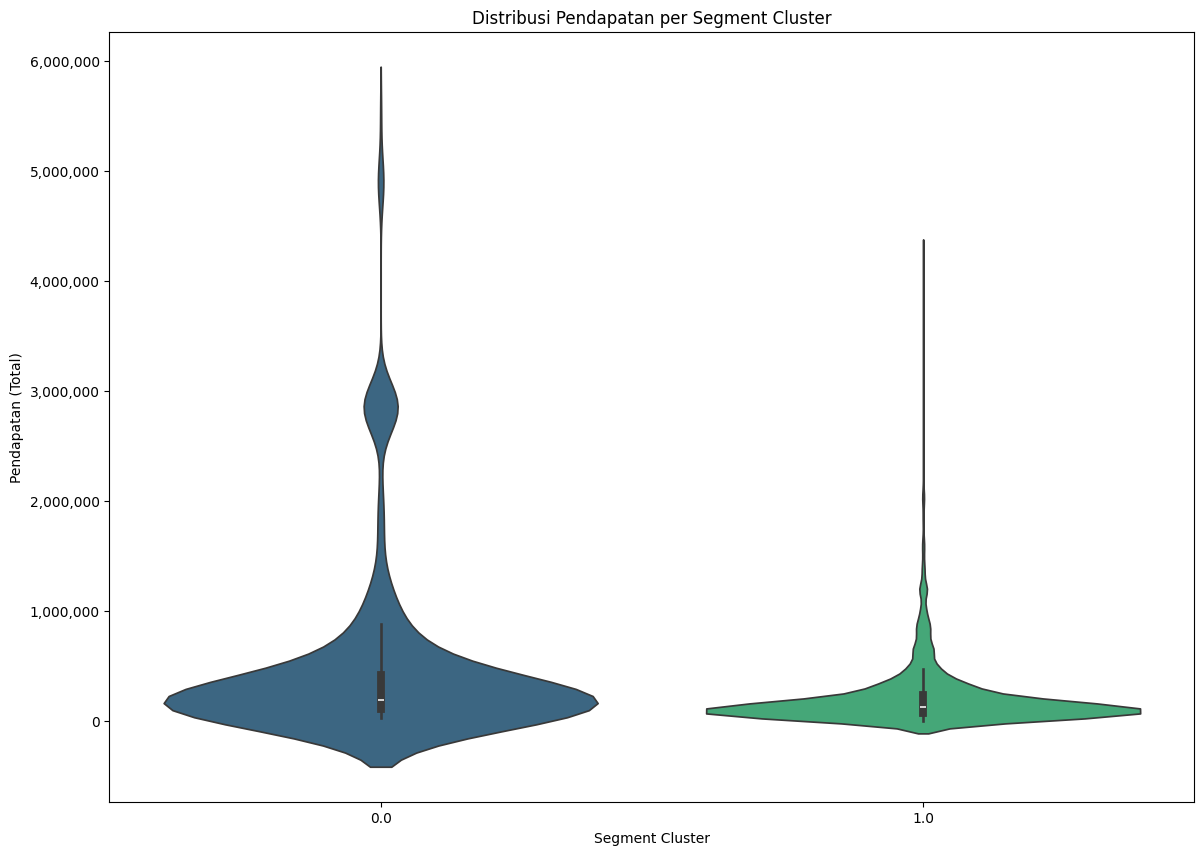

In [ ]:
# Visualisasi dengan boxplot
plt.figure(figsize=(14, 10))
sns.violinplot(x='segment', y='Total', data=df_segment, palette='viridis')
plt.xlabel('Segment Cluster')
plt.ylabel('Pendapatan (Total)')
plt.title('Distribusi Pendapatan per Segment Cluster')

# Menetapkan formatter untuk sumbu Y
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Menggunakan format angka tanpa desimal
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### Analisis By Diskon

<Figure size 1400x800 with 0 Axes>

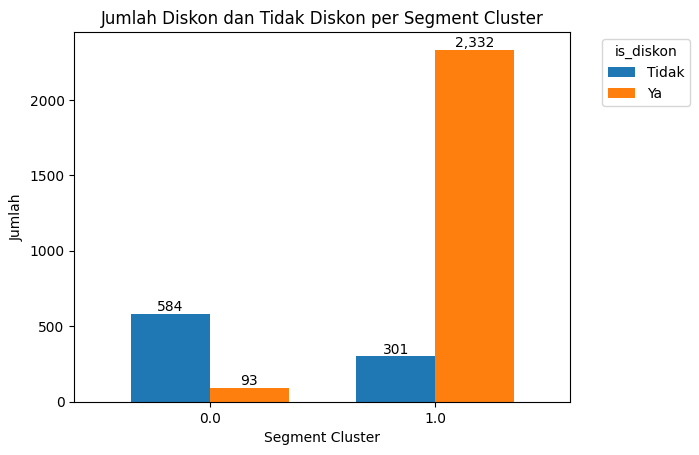

In [ ]:
# Mengelompokkan data berdasarkan segment dan is_diskon, lalu menghitung jumlah kemunculan untuk setiap kombinasi
discount_segment_counts = df_segment.groupby(['segment', 'is_diskon']).size().unstack().fillna(0)

# Mengatur ukuran visualisasi dan lebar bar
plt.figure(figsize=(14, 8))
ax = discount_segment_counts.plot(kind='bar', stacked=False, width=0.7)

# Menambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Label dan judul
plt.xlabel('Segment Cluster')
plt.ylabel('Jumlah')
plt.title('Jumlah Diskon dan Tidak Diskon per Segment Cluster')
plt.xticks(rotation=0)
plt.legend(title='is_diskon', labels=['Tidak', 'Ya'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Analisis By Jam Pembelian

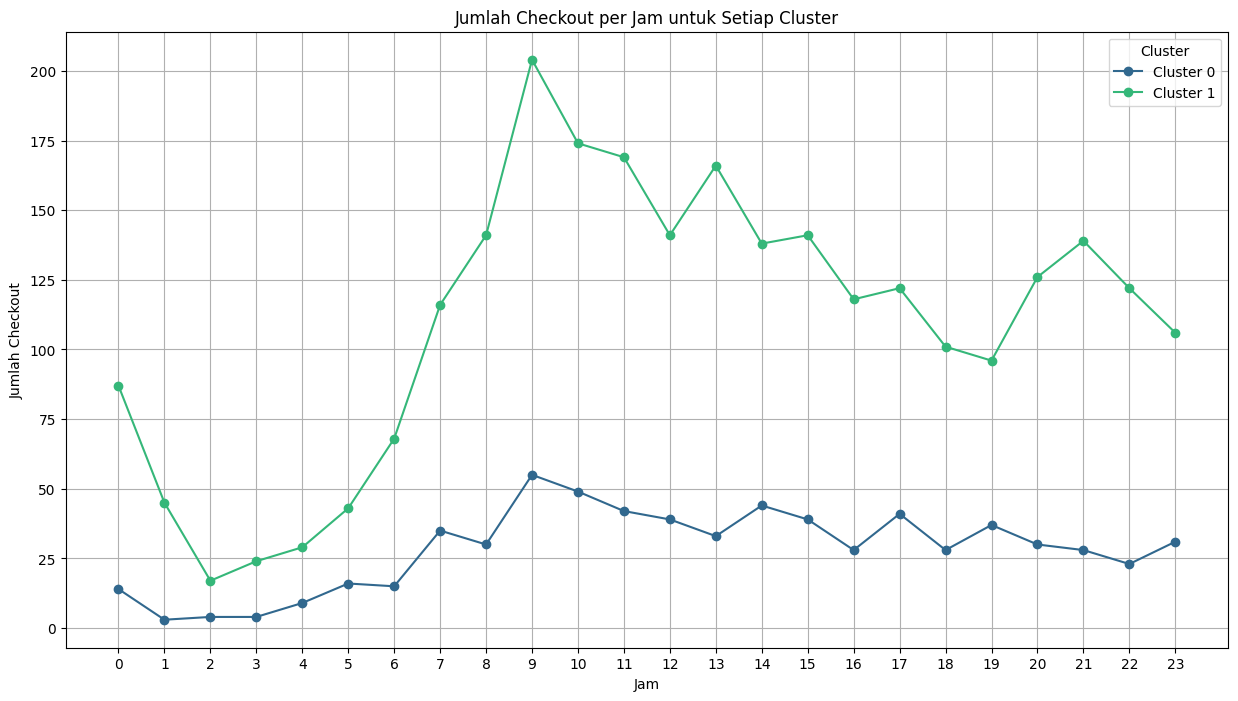

In [ ]:
#Prepare data for visualization
hourly_counts = df_segment.groupby(['segment', 'Hour']).size().unstack().fillna(0)
hourly_counts = hourly_counts.T

# Visualisasi
plt.figure(figsize=(15, 8))
colors = sns.color_palette("viridis", cluster.n_clusters)

for i in range(cluster.n_clusters):
    plt.plot(hourly_counts.index, hourly_counts[i], marker='o', color=colors[i], label=f'Cluster {i}')

plt.title('Jumlah Checkout per Jam untuk Setiap Cluster')
plt.xlabel('Jam')
plt.ylabel('Jumlah Checkout')
plt.legend(title='Cluster')
plt.xticks(range(24))
plt.grid(True)
plt.show()

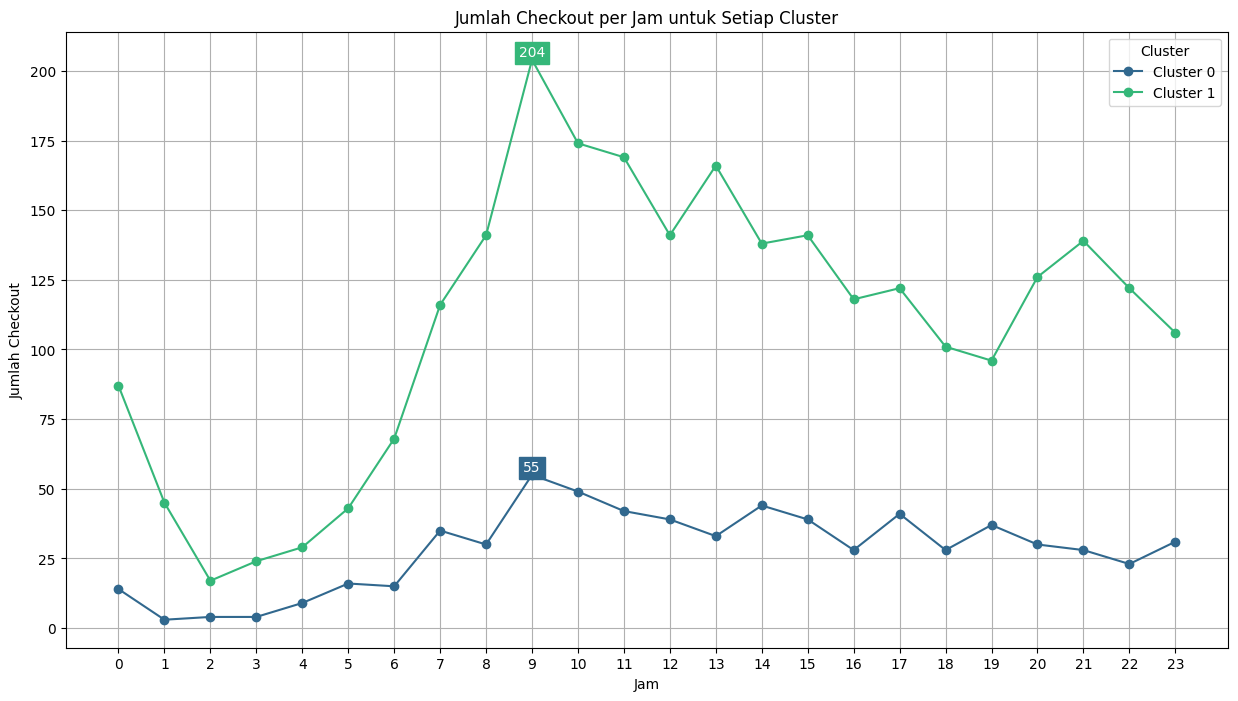

In [ ]:
# Prepare data for visualization
hourly_counts = df_segment.groupby(['segment', 'Hour']).size().unstack().fillna(0)
hourly_counts = hourly_counts.T

# Visualisasi
plt.figure(figsize=(15, 8))
colors = sns.color_palette("viridis", cluster.n_clusters)

for i in range(cluster.n_clusters):
    plt.plot(hourly_counts.index, hourly_counts[i], marker='o', color=colors[i], label=f'Cluster {i}')
    max_count = max(hourly_counts[i])
    max_index = hourly_counts[i].idxmax()
    if i == 2:
        plt.text(max_index, max_count+10, f'{int(max_count)}', fontsize=10, ha='center', va='bottom',
                 color='white', bbox=dict(facecolor=colors[i], edgecolor=colors[i], pad=3))
    else:
        plt.text(max_index, max_count, f'{int(max_count)}', fontsize=10, ha='center', va='bottom',
                 color='white', bbox=dict(facecolor=colors[i], edgecolor=colors[i], pad=3))

plt.title('Jumlah Checkout per Jam untuk Setiap Cluster')
plt.xlabel('Jam')
plt.ylabel('Jumlah Checkout')
plt.legend(title='Cluster')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### Analisis By Pembayaran

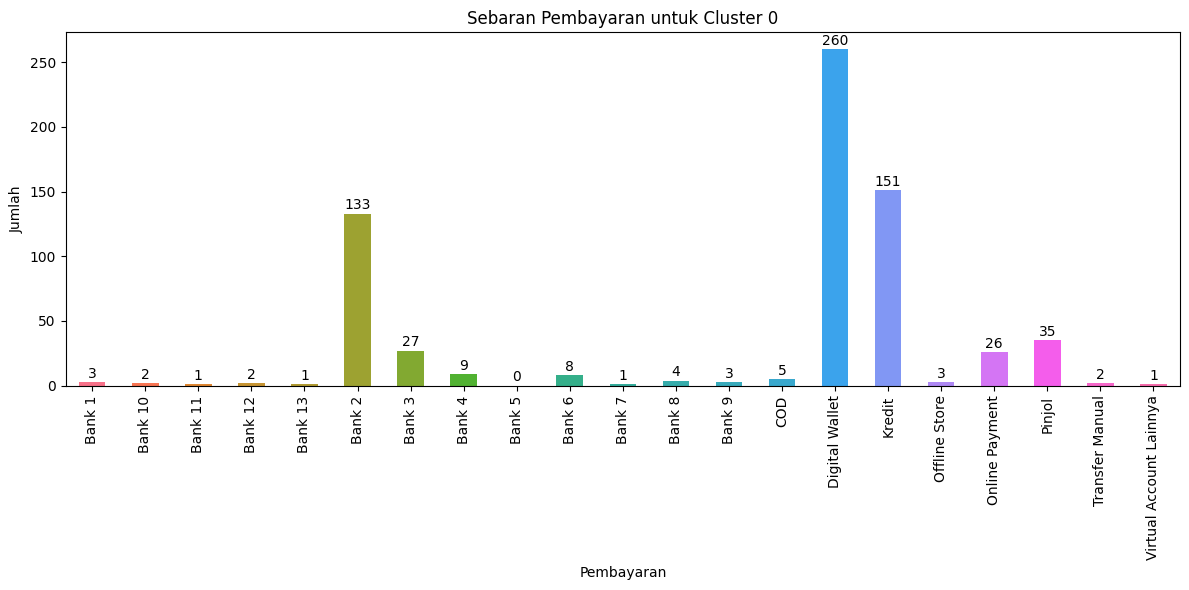

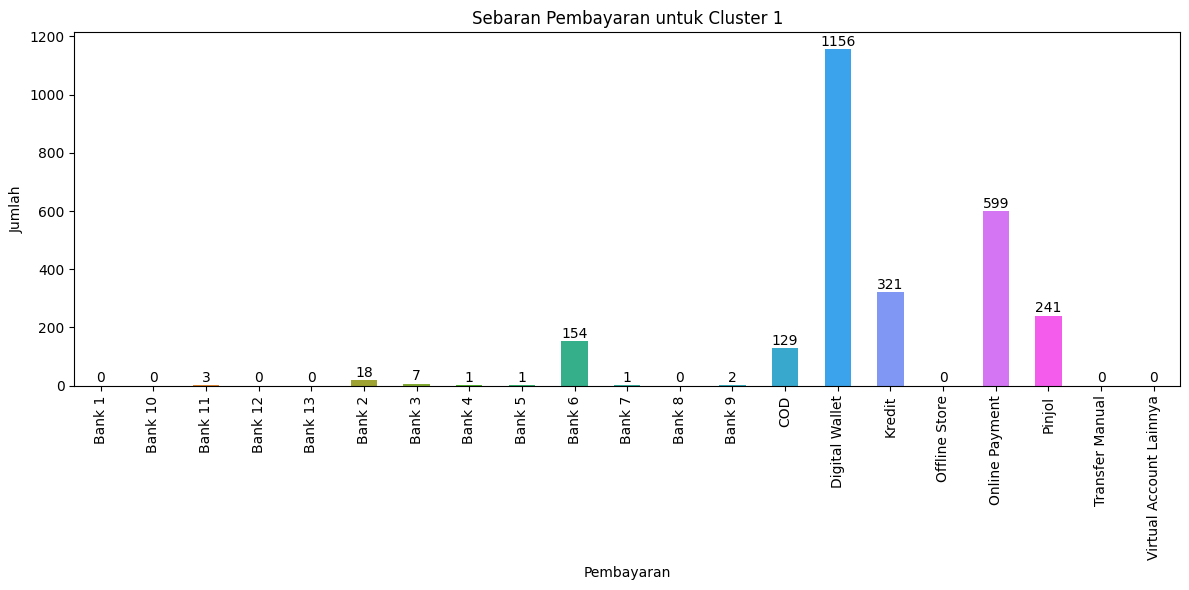

In [ ]:
# Mengelompokkan data berdasarkan cluster dan Pembayaran, lalu menghitung jumlah pembelian untuk setiap kombinasi
payment_cluster_counts = df_segment.groupby(['Pembayaran', 'segment']).size().unstack().fillna(0)

# Plotting barplot untuk Cluster 0
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(payment_cluster_counts.index))
payment_cluster_counts[0].plot(kind='bar', color=palette)
for index, value in enumerate(payment_cluster_counts[0]):
    plt.text(index, value + 1, f'{int(value)}', ha='center', va='bottom')
plt.xlabel('Pembayaran')
plt.ylabel('Jumlah')
plt.title('Sebaran Pembayaran untuk Cluster 0')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting barplot untuk Cluster 1
plt.figure(figsize=(12, 6))
payment_cluster_counts[1].plot(kind='bar', color=palette)
for index, value in enumerate(payment_cluster_counts[1]):
    plt.text(index, value + 1, f'{int(value)}', ha='center', va='bottom')
plt.xlabel('Pembayaran')
plt.ylabel('Jumlah')
plt.title('Sebaran Pembayaran untuk Cluster 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df['Pembayaran'].value_counts()

Pembayaran
Digital Wallet             1416
Online Payment              625
Kredit                      473
Pinjol                      276
Bank 6                      162
Bank 2                      151
COD                         134
Bank 3                       34
Bank 4                       10
Bank 9                        5
Bank 8                        4
Bank 11                       4
Offline Store                 3
Bank 1                        3
Bank 10                       2
Transfer Manual               2
Bank 7                        2
Bank 12                       2
Virtual Account Lainnya       1
Bank 13                       1
Bank 5                        1
Name: count, dtype: int64

## Analisis Top 5 SKU tiap CLuster

<ipython-input-38-27861ad2ca25>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_skus.loc[segment_cluster], y=sku_counts.loc[segment_cluster, top_skus.loc[segment_cluster]], palette='viridis')
<ipython-input-38-27861ad2ca25>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_skus.loc[segment_cluster], y=sku_counts.loc[segment_cluster, top_skus.loc[segment_cluster]], palette='viridis')


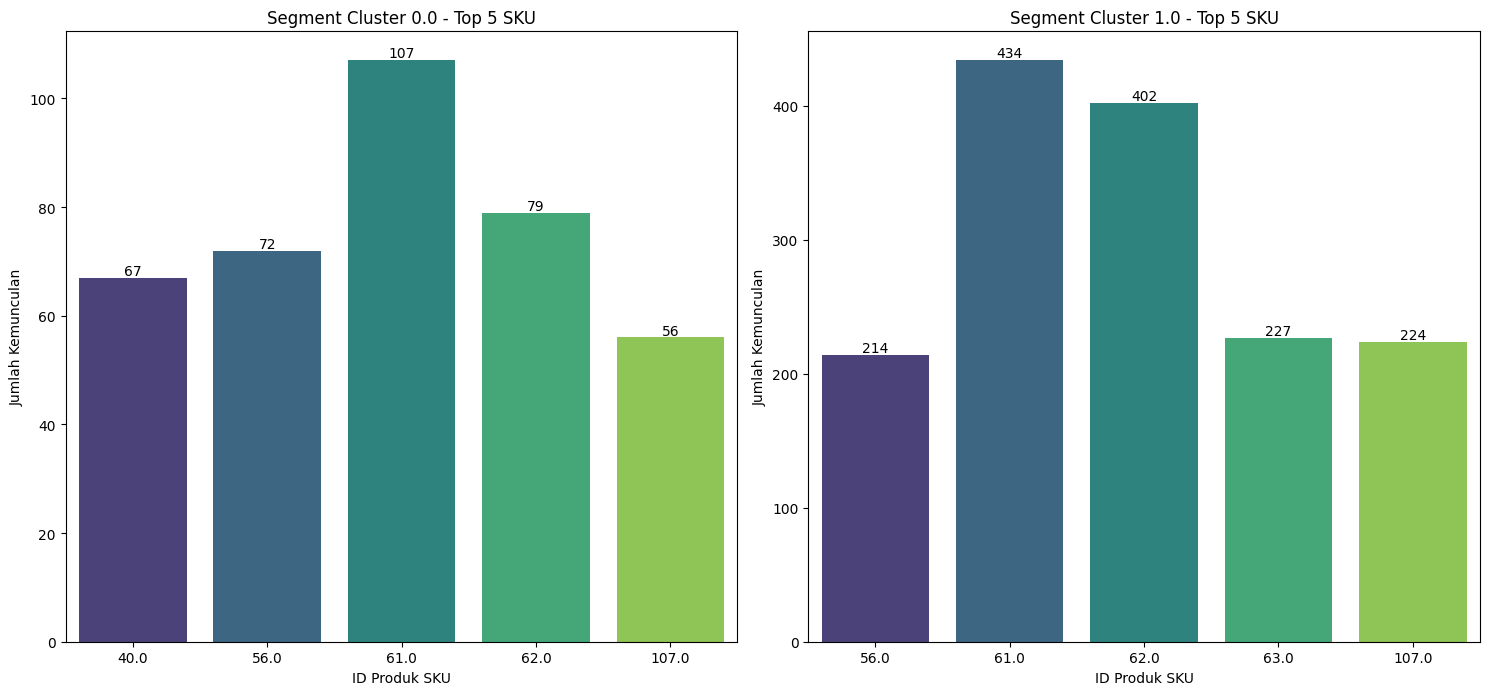

In [ ]:
# Melt SKU columns into one DataFrame
sku_columns = [f'SKU_{i}' for i in range(1, 13)]
sku_df = df_segment.melt(id_vars=['segment'], value_vars=sku_columns, var_name='SKU_Column', value_name='SKU')

# Hitung jumlah kemunculan setiap SKU dalam setiap segment cluster
sku_counts = sku_df.groupby(['segment', 'SKU']).size().unstack(fill_value=0)

# Pilih top 5 SKU untuk setiap segment cluster
top_skus = sku_counts.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)

plt.figure(figsize=(15, 20))

for i, segment_cluster in enumerate(top_skus.index):
    plt.subplot(3, 2, i+1)
    ax = sns.barplot(x=top_skus.loc[segment_cluster], y=sku_counts.loc[segment_cluster, top_skus.loc[segment_cluster]], palette='viridis')

    # Menambahkan angka pasti di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title(f'Segment Cluster {segment_cluster} - Top 5 SKU')
    plt.xlabel('ID Produk SKU')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()


### Analisis By Kota

<ipython-input-39-2074b6f31e8b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.loc[segment_cluster], y=city_counts.loc[segment_cluster, top_cities.loc[segment_cluster]], palette='viridis')
<ipython-input-39-2074b6f31e8b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.loc[segment_cluster], y=city_counts.loc[segment_cluster, top_cities.loc[segment_cluster]], palette='viridis')


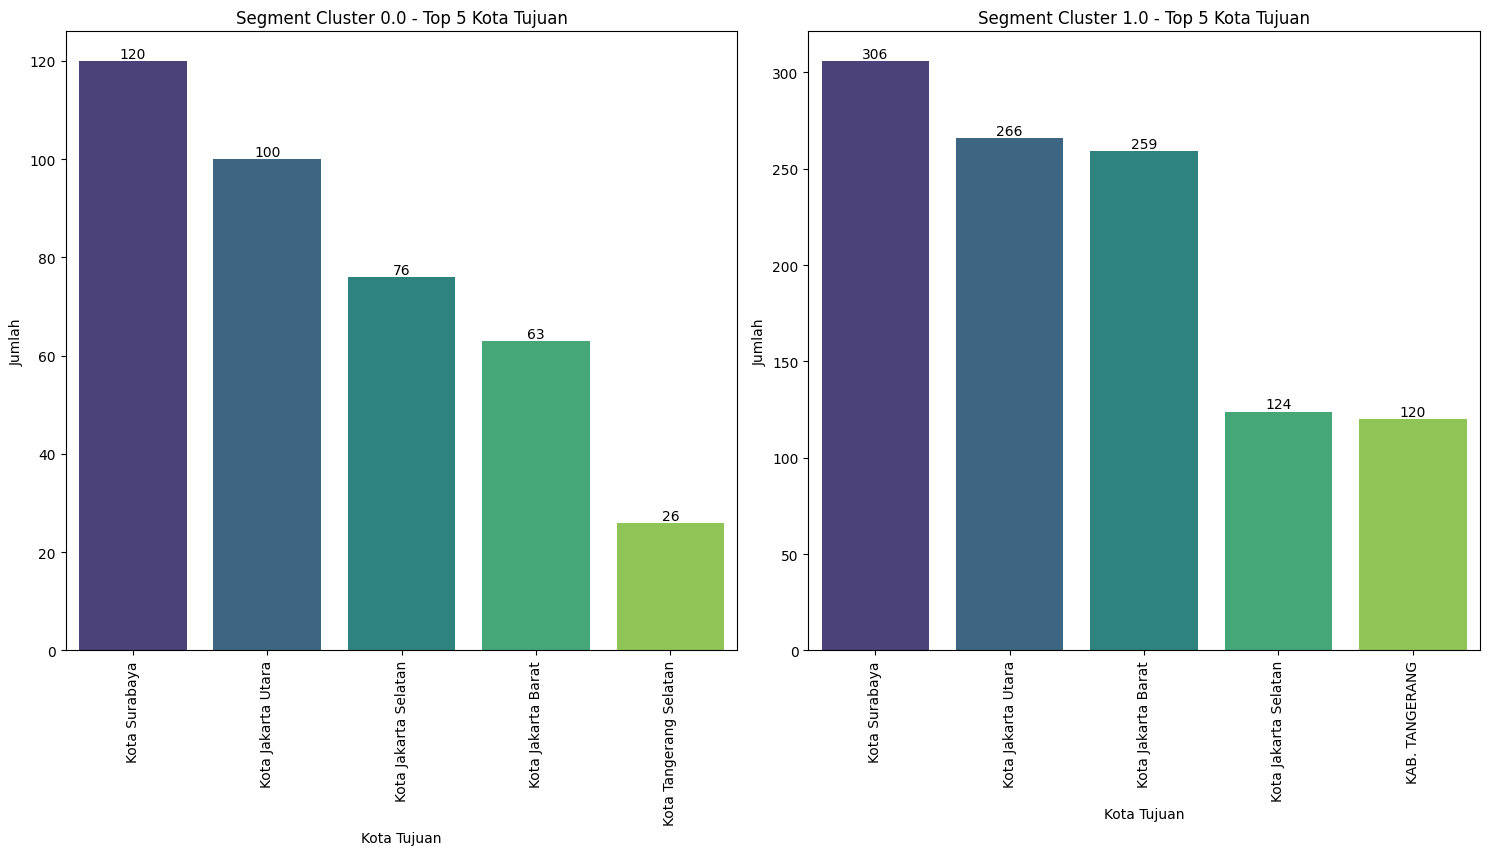

In [ ]:
# Hitung jumlah kemunculan setiap kota dalam setiap segment cluster
city_counts = df_segment.groupby(['segment', 'Kota']).size().unstack(fill_value=0)

# Pilih top 5 kota untuk setiap segment cluster
top_cities = city_counts.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)

# Plotting
plt.figure(figsize=(15, 15))

for i, segment_cluster in enumerate(top_cities.index):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=top_cities.loc[segment_cluster], y=city_counts.loc[segment_cluster, top_cities.loc[segment_cluster]], palette='viridis')

    # Menambahkan angka pasti di atas setiap bar
    for index, value in enumerate(city_counts.loc[segment_cluster, top_cities.loc[segment_cluster]]):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.title(f'Segment Cluster {segment_cluster} - Top 5 Kota Tujuan')
    plt.xlabel('Kota Tujuan')
    plt.ylabel('Jumlah')

    # Meluruskan label X
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



### Analisis By Jenis Pesanan

In [ ]:
df_segment['Jenis Pesanan'].value_counts()

Jenis Pesanan
Pesanan Normal    3289
Pre-Order           22
Name: count, dtype: int64

<Figure size 1400x800 with 0 Axes>

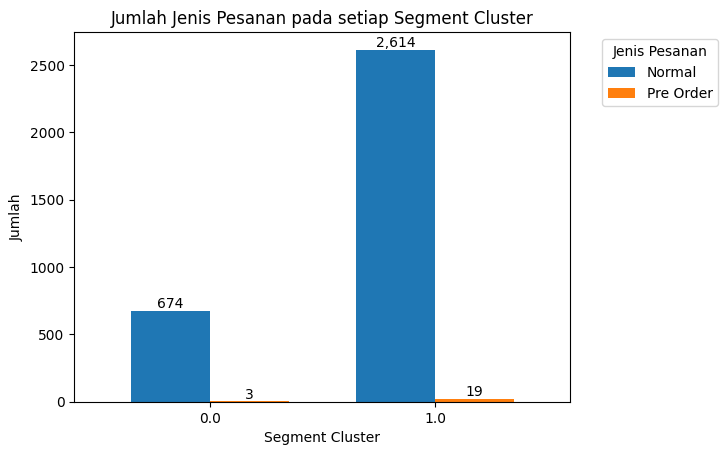

In [ ]:
# Mengelompokkan data berdasarkan segment dan Jenis Pesanan, lalu menghitung jumlah kemunculan untuk setiap kombinasi
discount_segment_counts = df_segment.groupby(['segment', 'Jenis Pesanan']).size().unstack().fillna(0)

# Mengatur ukuran visualisasi dan lebar bar
plt.figure(figsize=(14, 8))
ax = discount_segment_counts.plot(kind='bar', stacked=False, width=0.7)

# Menambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Label dan judul
plt.xlabel('Segment Cluster')
plt.ylabel('Jumlah')
plt.title('Jumlah Jenis Pesanan pada setiap Segment Cluster')
plt.xticks(rotation=0)
plt.legend(title='Jenis Pesanan', labels=['Normal', 'Pre Order'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
